<a href="https://colab.research.google.com/github/Mayuriluniya/Car_Damaged_Detection_Using_YOLOV5_VGG/blob/main/yolo_damaged_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (CPU)


In [ ]:
!unzip -q /content/drive/MyDrive/Datasets/car_all.zip -d /content/car_all

In [ ]:
!unzip -q /content/drive/MyDrive/Datasets/car_images.zip -d /content/car_images

In [ ]:
!unzip -q /content/drive/MyDrive/Datasets/yolo_damage_detection.zip -d ../

In [ ]:
!python /content/yolov5/train.py --img 640 --batch 32 --epochs 100 --data custom_dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_dataset.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache_images=True, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v5.0-338-gcd540d8 torch 1.9.0+cu102 CPU

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, sc

In [ ]:
!python val.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --data custom_dataset.yaml

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt  --img 640 --conf 0.25 --save-txt --save-conf --source /content/hopeso/images/validation

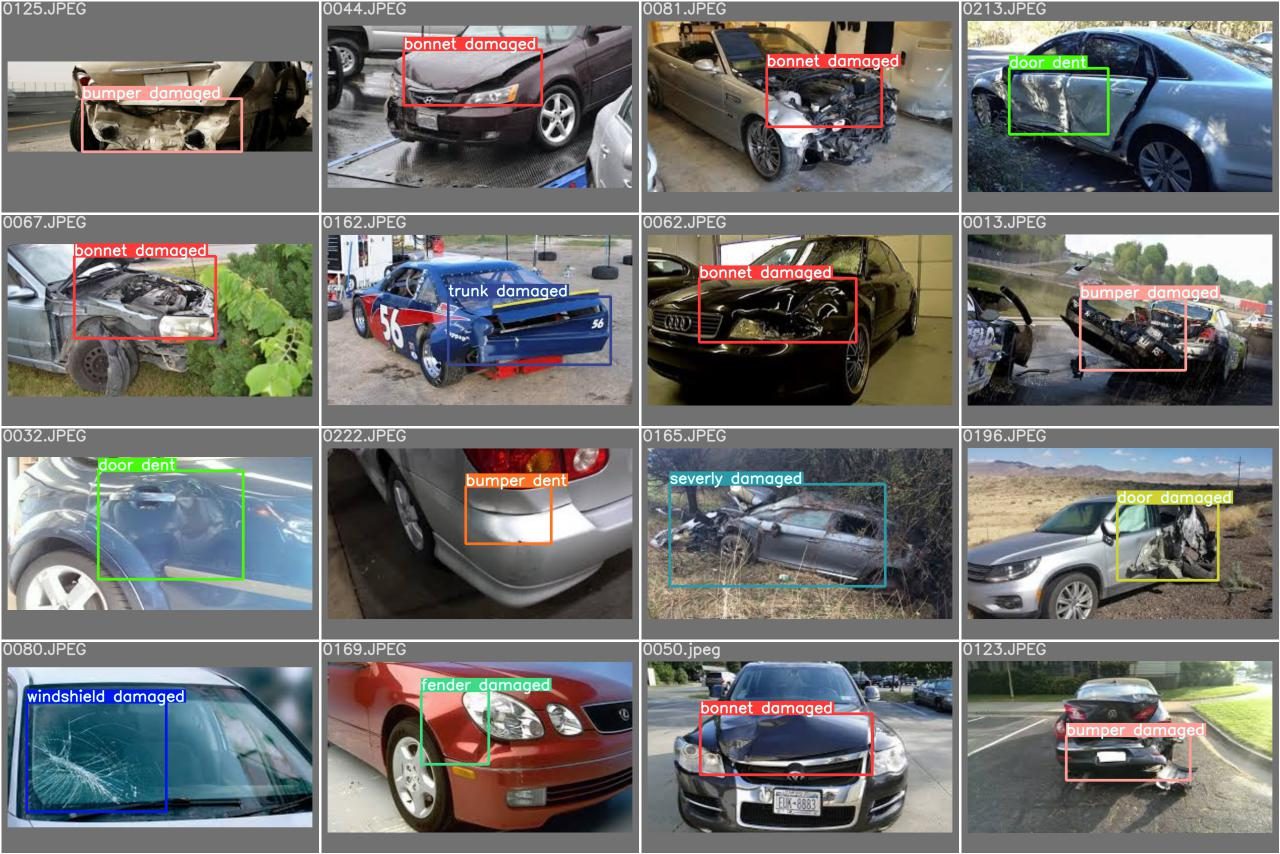

In [ ]:

Image(filename='/content/yolov5/runs/train/exp/val_batch0_labels.jpg', width=900)

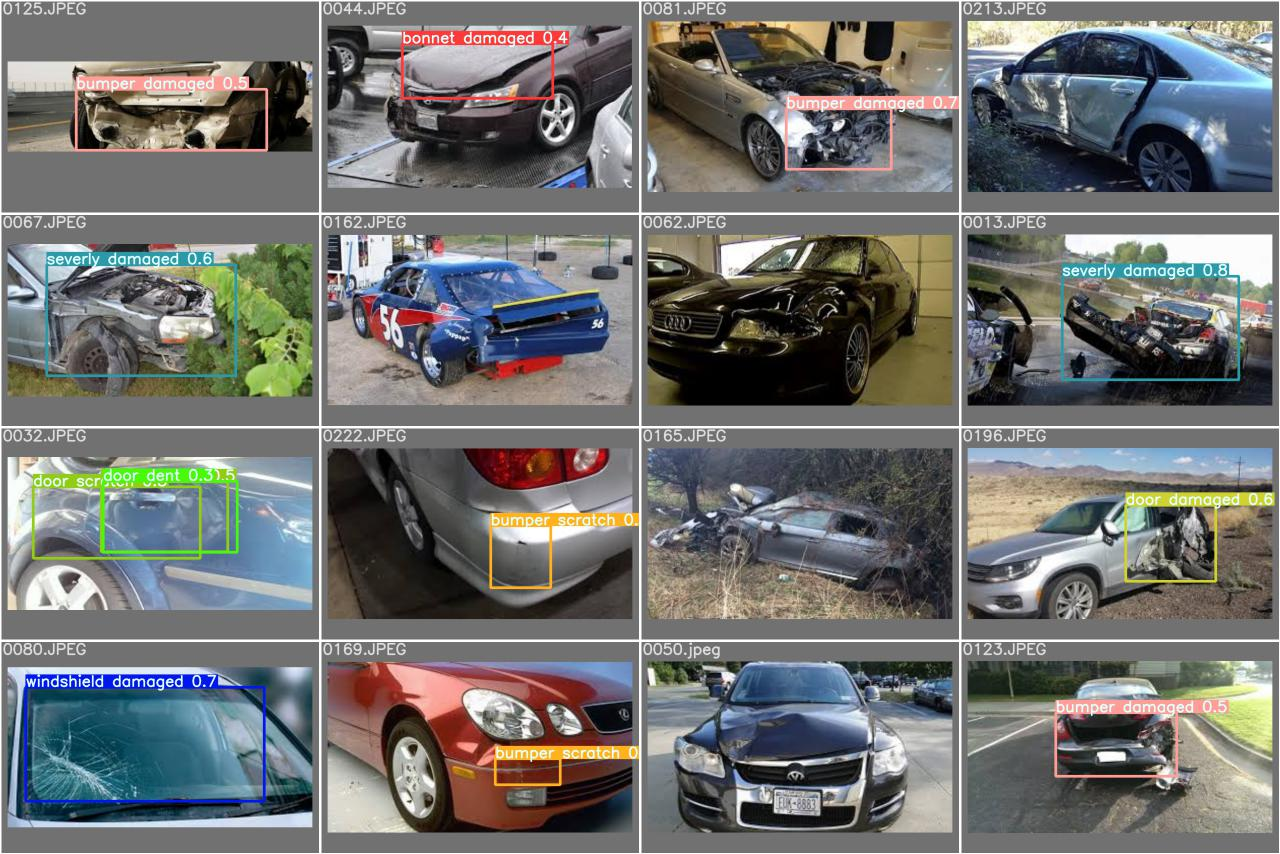

In [ ]:

Image(filename='/content/yolov5/runs/train/exp/val_batch0_pred.jpg', width=900)

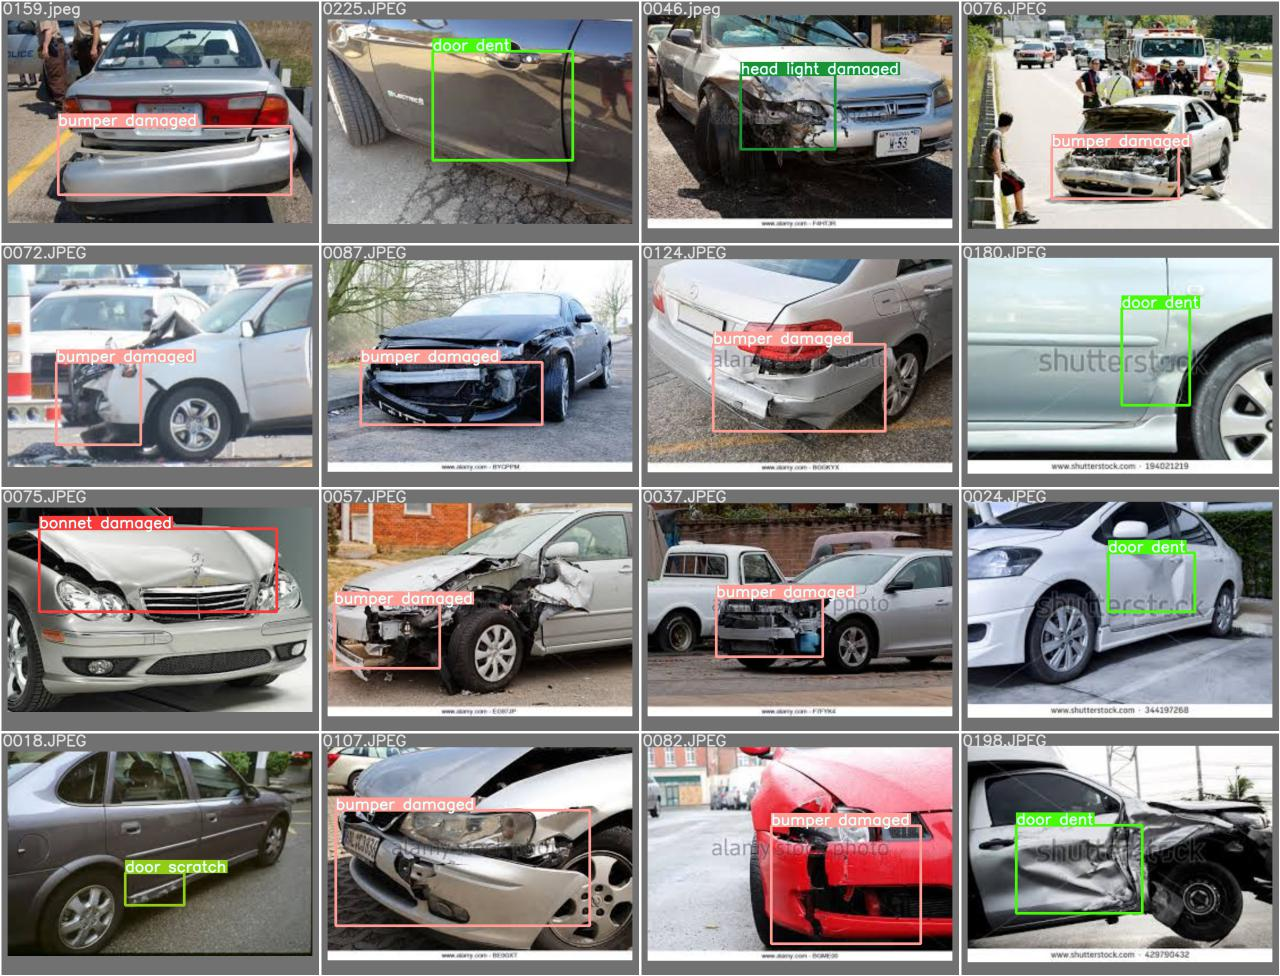

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/val_batch1_labels.jpg', width=900)

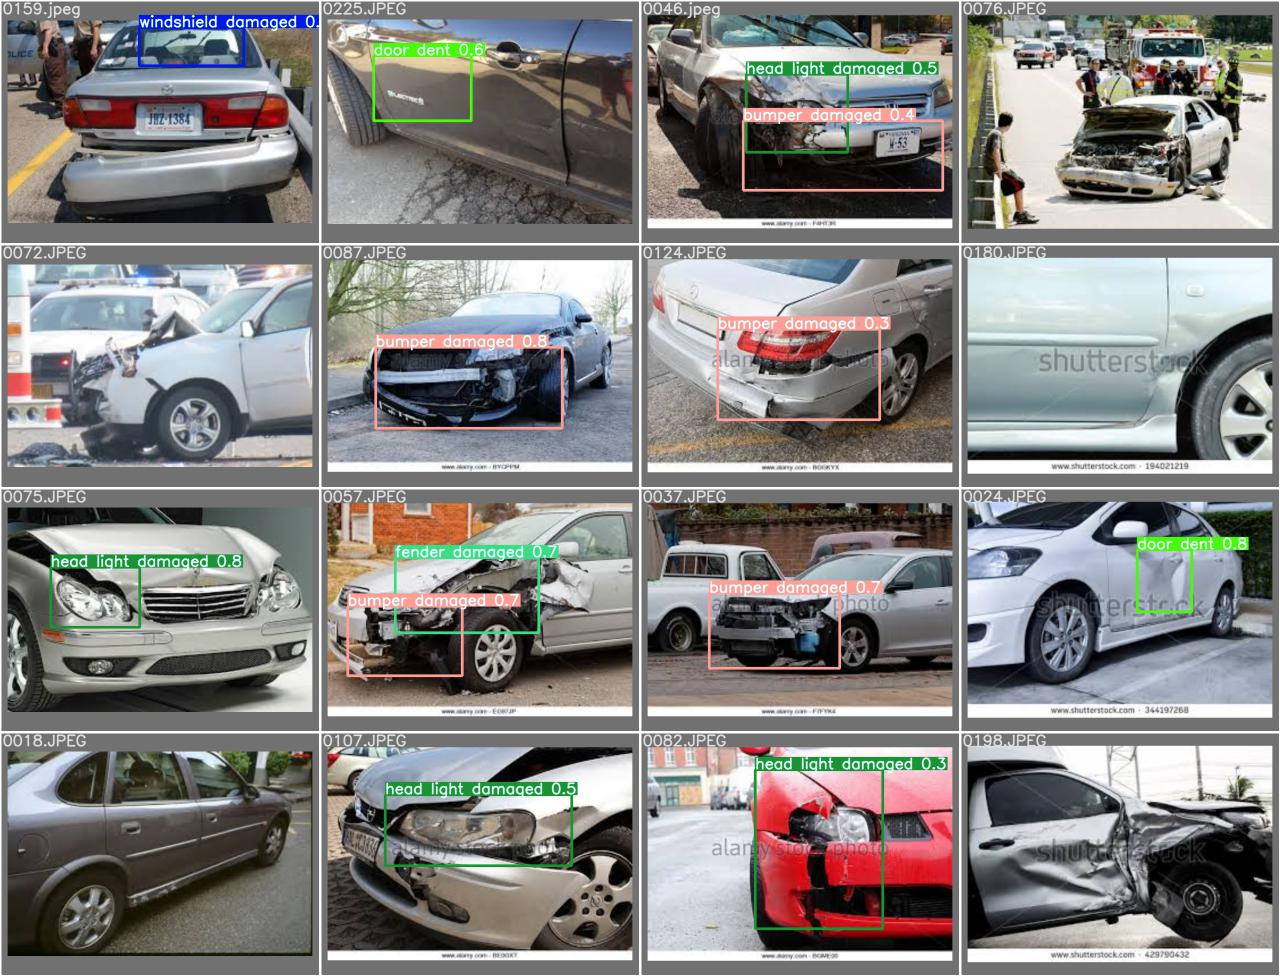

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/val_batch1_pred.jpg', width=900)

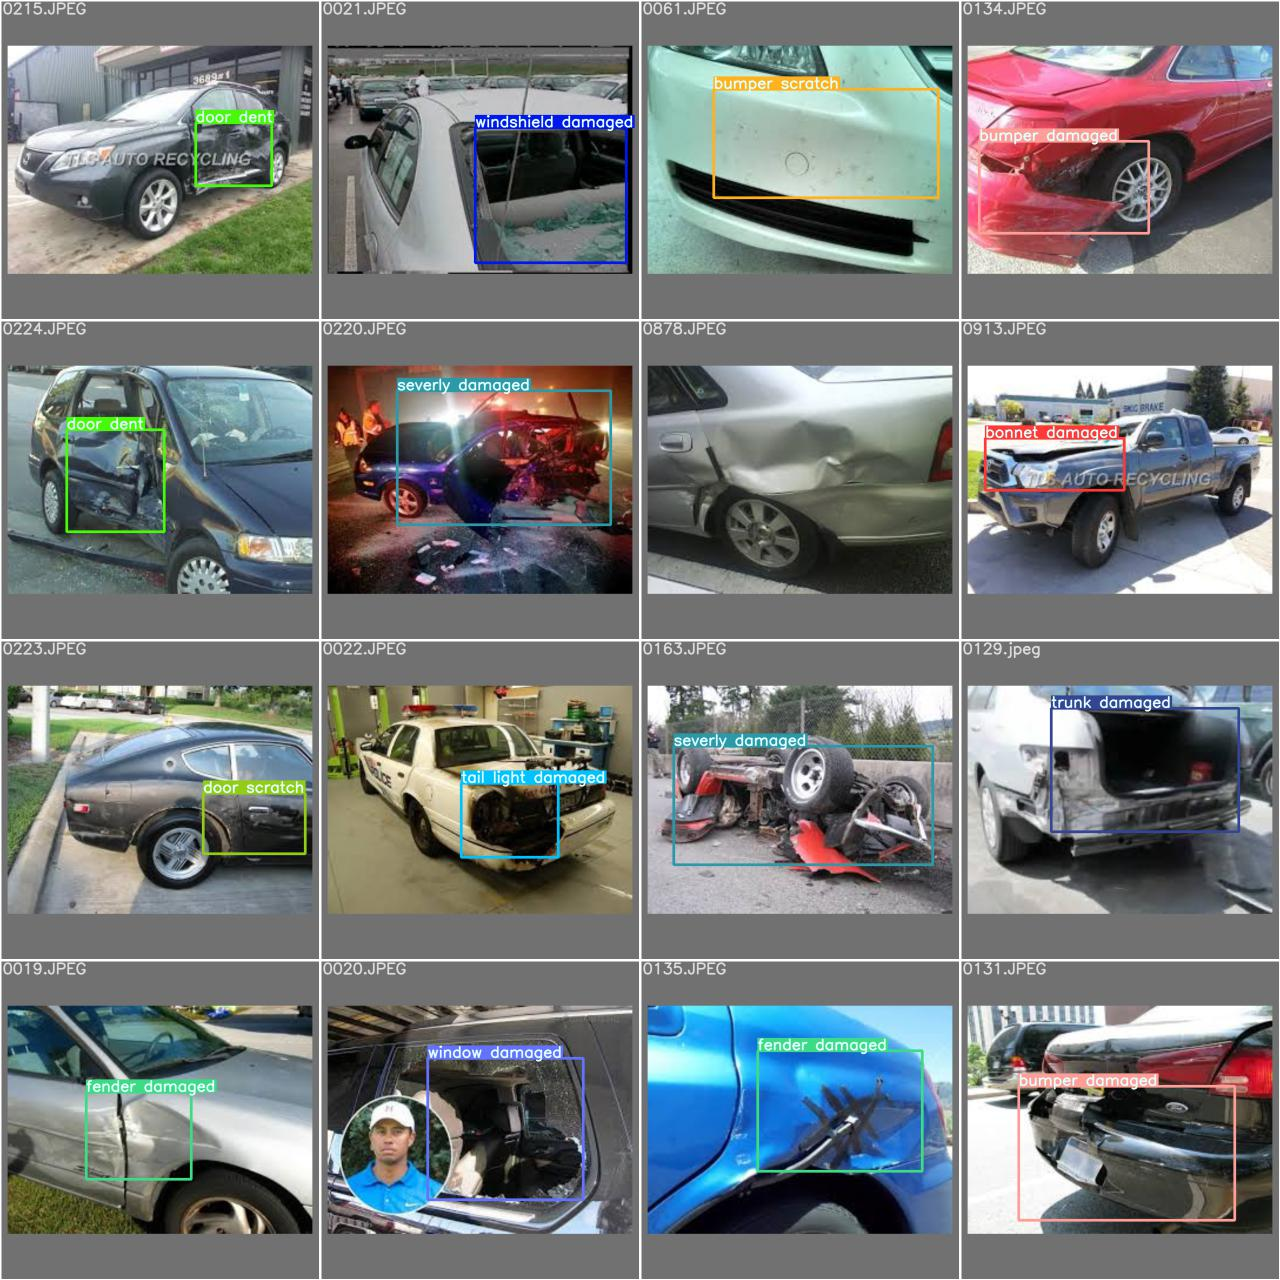

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/val_batch2_labels.jpg', width=900)

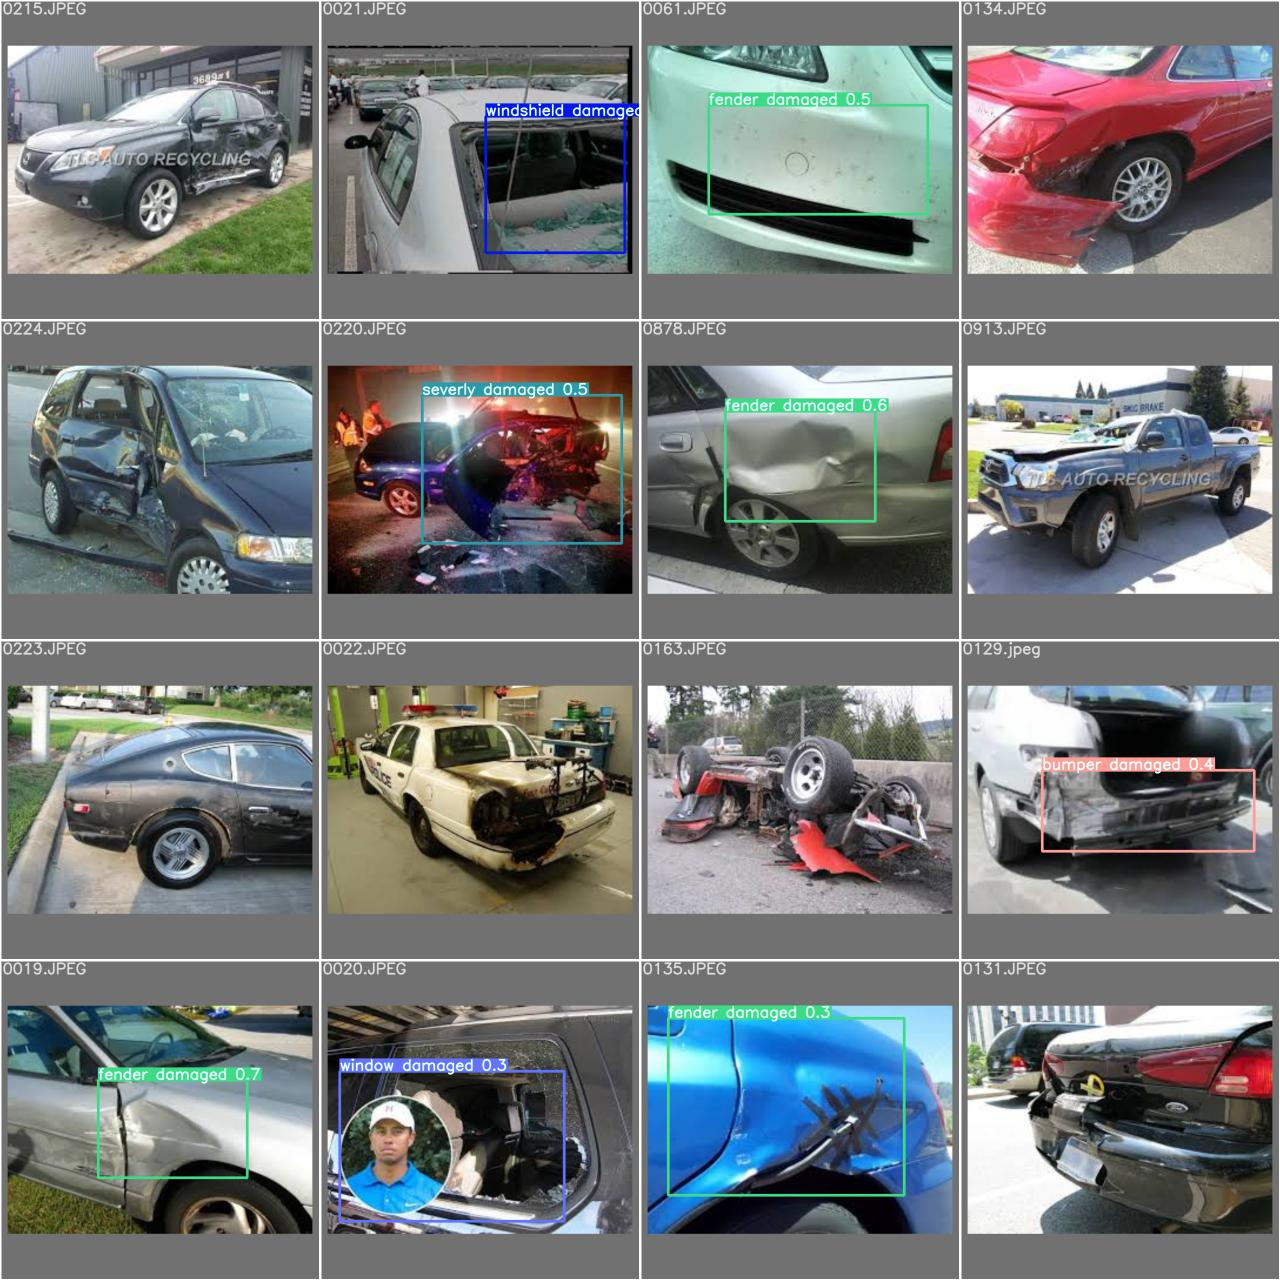

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/val_batch2_pred.jpg', width=900)

In [ ]:
!python val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data custom_dataset.yaml

val: data=./data/custom_dataset.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False
YOLOv5 🚀 v5.0-338-gcd540d8 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7091668 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning '/content/hopeso/labels/validation.cache' images and labels... 190 found, 5 missing, 0 empty, 0 corrupted: 100% 195/195 [00:00<00:00, 2169467.59it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 7/7 [00:03<00:00,  2.20it/s]
                 all        195        195      0.422      0.331      0.344      0.118
      bonnet damaged        195         29      0.415      0.207      0.244     0.0854
      bumper damaged      

In [ ]:
!unzip -q /content/car_images.zip -d ../

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt  --img 640 --conf 0.25 --save-txt --save-conf --source /content/car_images/

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/car_images/, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-338-gcd540d8 torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7091668 parameters, 0 gradients, 16.4 GFLOPs
image 1/160 /content/car_images/1.jpg: 384x640 1 head light damaged, Done. (0.012s)
image 2/160 /content/car_images/10.jpg: 384x640 1 bumper scratch, Done. (0.011s)
image 3/160 /content/car_images/100.jpg: 448x640 Done. (0.012s)
image 4/160 /content/car_images/101.jpg: 640x640 Done. (0.016s)
image 5/160 /content/car_images/102.jpg: 288x640 1 bonnet damaged, Done. (0.011s)
image 6/160 /content/car_

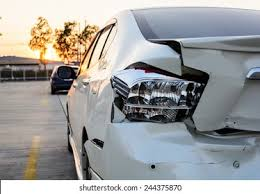

In [ ]:
Image(filename='/content/car_images/113.jpg', width=500) 

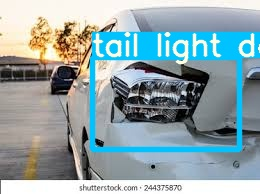

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp/113.jpg', width=500) 

In [ ]:
PRED_PATH = 'runs/detect/exp/labels'
!ls {PRED_PATH}

102.txt  120.txt  13.txt   155.txt  21.txt  34.txt  51.txt  71.txt  86.txt
105.txt  122.txt  141.txt  156.txt  22.txt  35.txt  52.txt  73.txt  87.txt
106.txt  123.txt  142.txt  157.txt  23.txt  36.txt  56.txt  74.txt  88.txt
107.txt  127.txt  144.txt  158.txt  25.txt  37.txt  57.txt  75.txt  89.txt
108.txt  129.txt  145.txt  15.txt   26.txt  38.txt  58.txt  76.txt  8.txt
10.txt	 12.txt   148.txt  160.txt  27.txt  3.txt   5.txt   77.txt  90.txt
112.txt  130.txt  149.txt  161.txt  29.txt  40.txt  60.txt  78.txt  92.txt
113.txt  132.txt  14.txt   16.txt   2.txt   41.txt  61.txt  7.txt   94.txt
116.txt  133.txt  150.txt  18.txt   30.txt  42.txt  62.txt  81.txt  95.txt
117.txt  135.txt  151.txt  19.txt   31.txt  43.txt  64.txt  82.txt  96.txt
118.txt  136.txt  152.txt  1.txt    32.txt  44.txt  65.txt  83.txt  97.txt
11.txt	 139.txt  154.txt  20.txt   33.txt  48.txt  68.txt  84.txt  9.txt


In [ ]:
%cat /content/yolov5/runs/detect/exp/labels/113.txt

11 0.636538 0.530928 0.565385 0.474227 0.61284


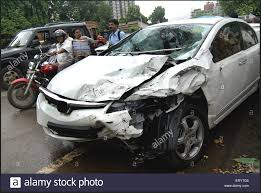

In [ ]:
Image(filename='/content/car_images/88.jpg', width=500) 

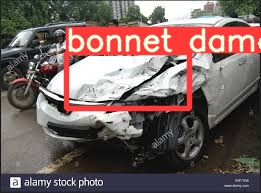

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp/88.jpg', width=500) 

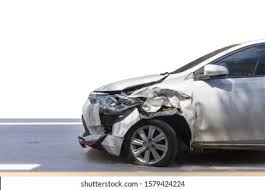

In [ ]:
Image(filename='/content/car_images/29.jpg', width=500) 

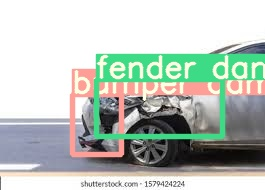

In [ ]:
Image(filename='/content/yolov5/runs/detect/exp/29.jpg', width=500) 

In [ ]:
%cat /content/yolov5/runs/detect/exp/labels/88.txt

0 0.488506 0.414508 0.471264 0.290155 0.548939


In [ ]:
%cat /content/yolov5/runs/detect/exp/labels/113.txt

11 0.636538 0.530928 0.565385 0.474227 0.61284


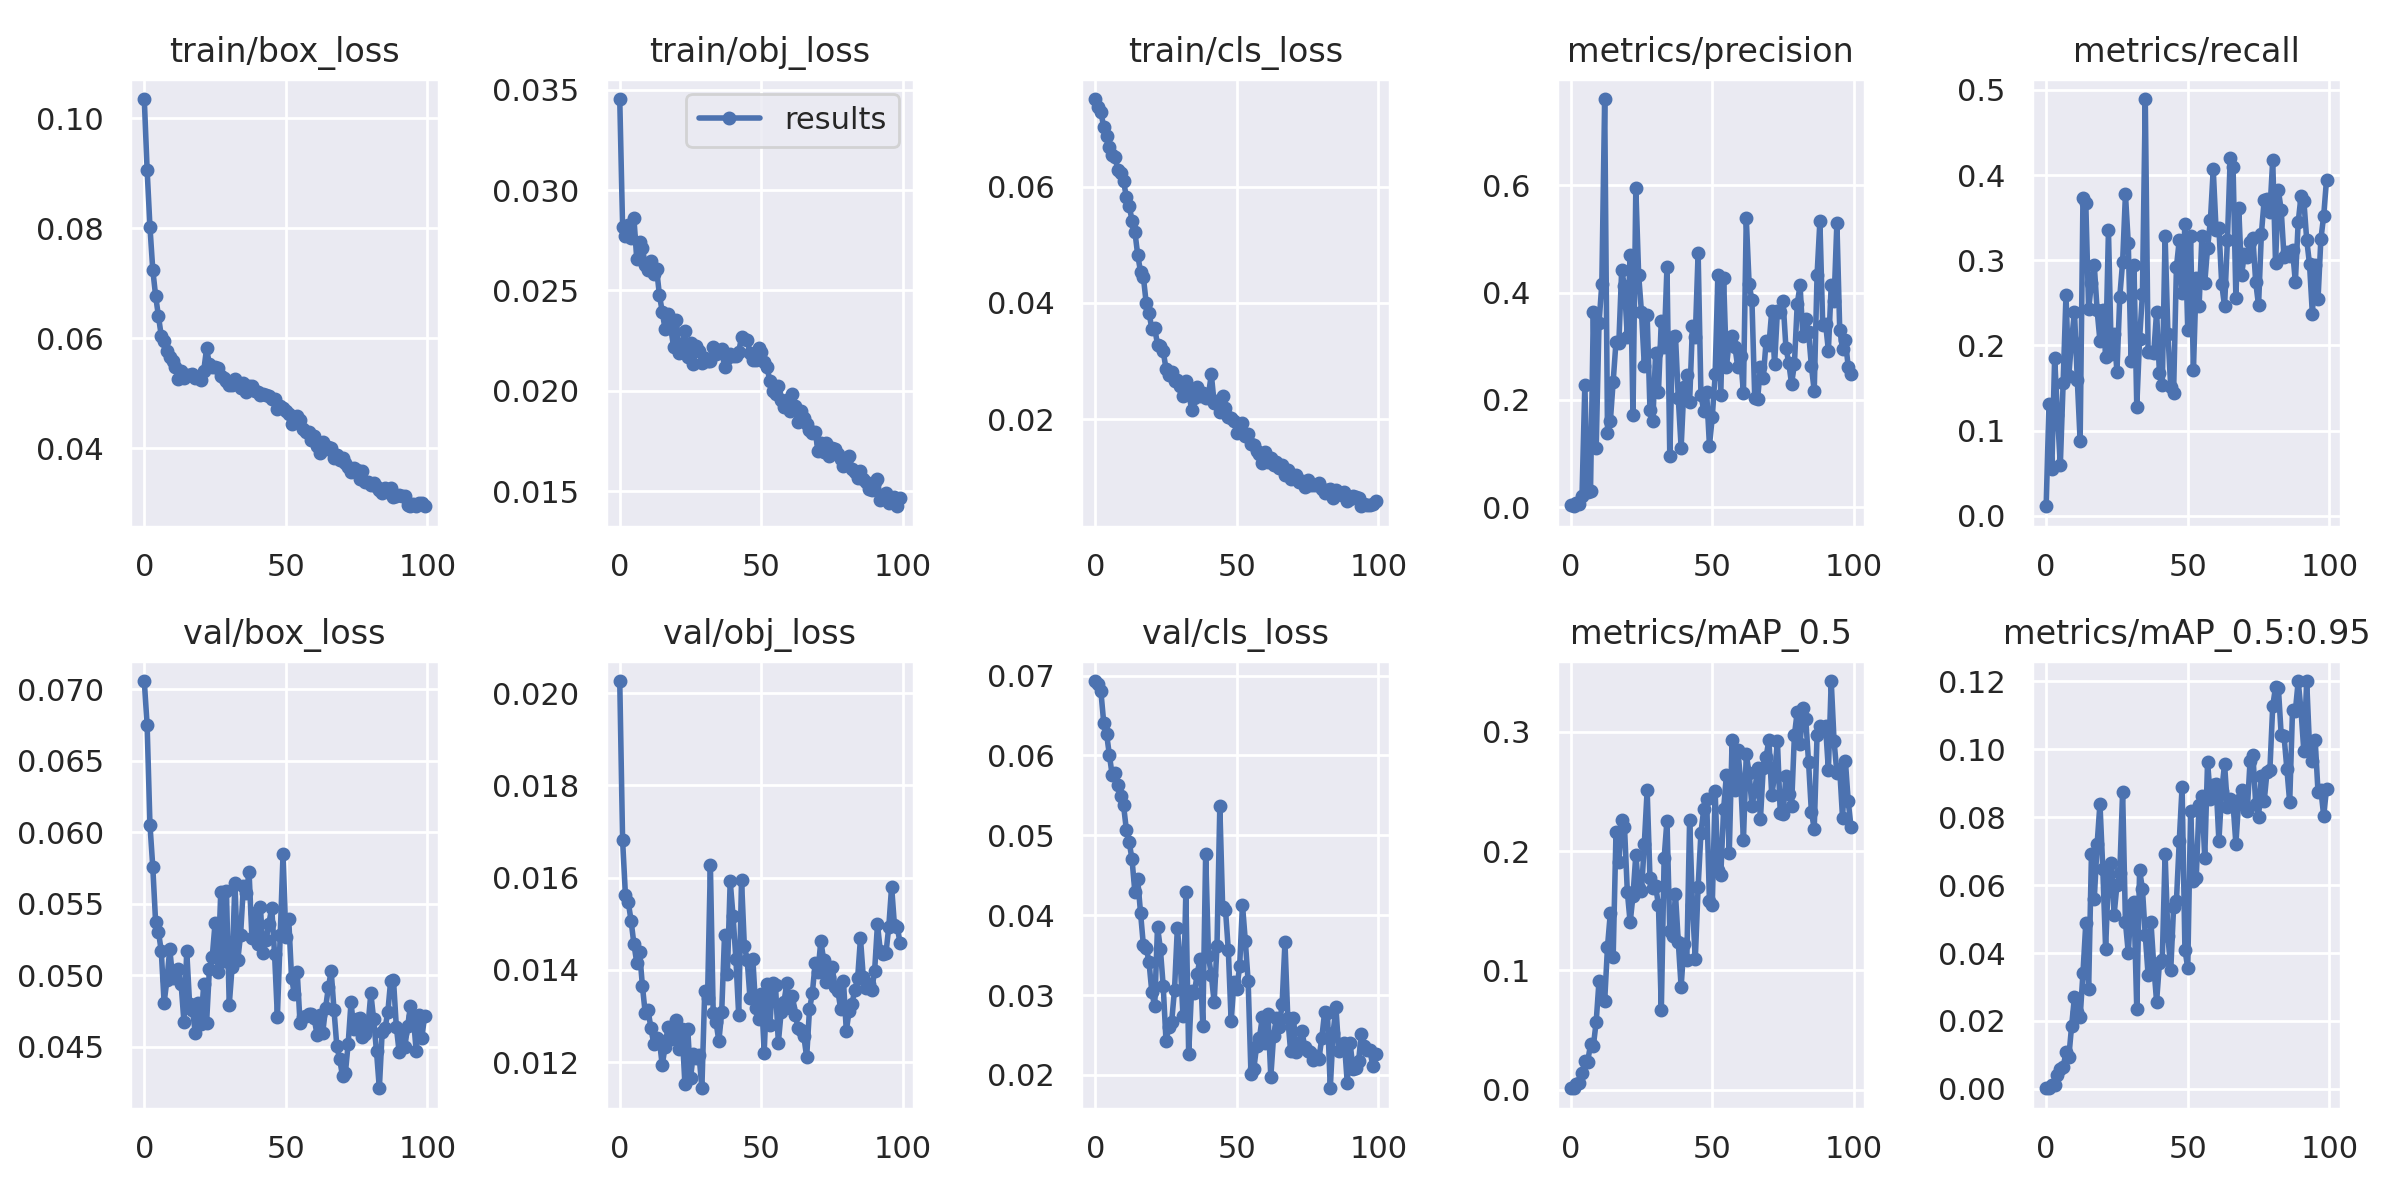

In [ ]:
 
from utils.plots import plot_results  
Image(filename='/content/yolov5/runs/train/exp/results.png', width=1000) 

In [ ]:
!zip -r /content/yolo_damage_detection.zip /content/yolov5/

  adding: content/yolov5/ (stored 0%)
  adding: content/yolov5/data/ (stored 0%)
  adding: content/yolov5/data/xView.yaml (deflated 58%)
  adding: content/yolov5/data/VisDrone.yaml (deflated 59%)
  adding: content/yolov5/data/custom_dataset.yaml (deflated 56%)
  adding: content/yolov5/data/coco128.yaml (deflated 50%)
  adding: content/yolov5/data/hyps/ (stored 0%)
  adding: content/yolov5/data/hyps/hyp.scratch.yaml (deflated 55%)
  adding: content/yolov5/data/hyps/hyp.scratch-p6.yaml (deflated 54%)
  adding: content/yolov5/data/hyps/hyp.finetune.yaml (deflated 46%)
  adding: content/yolov5/data/hyps/hyp.finetune_objects365.yaml (deflated 43%)
  adding: content/yolov5/data/.ipynb_checkpoints/ (stored 0%)
  adding: content/yolov5/data/images/ (stored 0%)
  adding: content/yolov5/data/images/zidane.jpg (deflated 0%)
  adding: content/yolov5/data/images/bus.jpg (deflated 1%)
  adding: content/yolov5/data/Argoverse.yaml (deflated 56%)
  adding: content/yolov5/data/coco.yaml (deflated 53%)
 

In [ ]:
%cp /content/yolo_damage_detection.zip /content/drive/MyDrive/Datasets

In [ ]:
%cp /content/car_images.zip /content/drive/MyDrive/Datasets

In [ ]:
%cp /content/car_all.zip  /content/drive/MyDrive/Datasets